In [4]:
#Boston Housing Prices

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
boston_dataset=load_boston()

boston=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target
boston.head()










,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


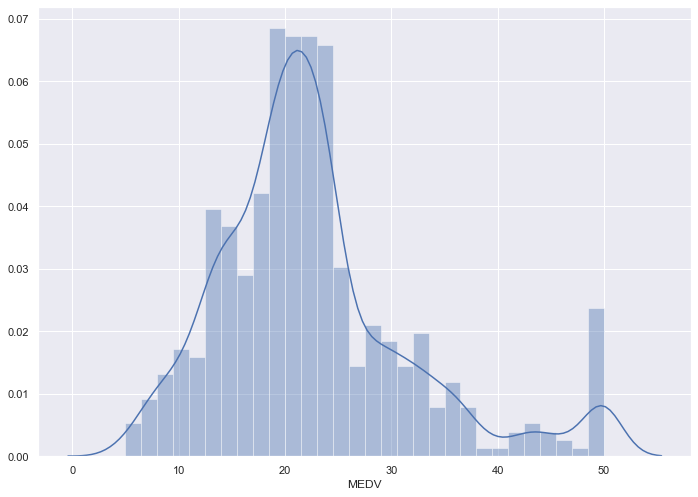

In [9]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()



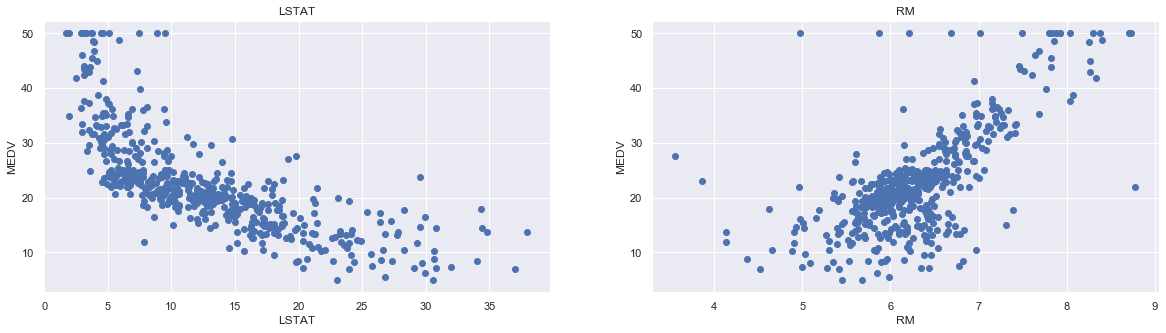

In [6]:
plt.figure(figsize=(20,5))

features=['LSTAT','RM']
target=boston['MEDV']

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [18]:
from sklearn.model_selection import train_test_split


X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y=boston['MEDV']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
print(X_train.shape) #80percent of the Data in two columns
print(X_test.shape) #20Percent
print(Y_train.shape) 
print(Y_test.shape)



(404, 2)
(102, 2)
(404,)
(102,)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y=boston['MEDV']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)
linear_model=LinearRegression()
linear_model.fit(X_train,Y_train)

y_train_predict=linear_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))
r2=r2_score(Y_train,y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



print("The Model Performance for Test Set")
print("-----------------------------------")
y_test_predict=linear_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_test,y_test_predict)))
r2=r2_score(Y_test,y_test_predict)
print('RMSE is {}'.format(rmse))
print('R2 Score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The Model Performance for Test Set
-----------------------------------
RMSE is 5.137400784702911
R2 Score is 0.6628996975186953


